In [1]:
from ultralytics import YOLO
import os
import tensorboard
import torch

In [2]:
ls

 Volume in drive F is superszybkissd
 Volume Serial Number is 98A2-EE81

 Directory of f:\PRACA_MAGISTERSKA\UCZENIE_MODELI\yolov10s

16.06.2025  14:54    <DIR>          .
23.06.2025  14:58    <DIR>          ..
23.03.2025  03:27    <DIR>          .ipynb_checkpoints
23.03.2025  03:27               150 data.yaml
05.03.2025  23:03    <DIR>          predictions
04.03.2025  22:30    <DIR>          runs
04.03.2025  22:30         5˙613˙764 yolo11n.pt
16.06.2025  14:54           838˙962 yolov10s.ipynb
26.02.2025  13:18        16˙623˙111 yolov10s.pt
               4 File(s)     23˙075˙987 bytes
               5 Dir(s)  81˙529˙495˙552 bytes free


In [3]:
%load_ext tensorboard
%tensorboard --logdir runs/detect

Reusing TensorBoard on port 6008 (pid 22704), started 1 day, 0:20:39 ago. (Use '!kill 22704' to kill it.)

In [4]:
torch.cuda.empty_cache()

# Load a COCO-pretrained model
model = YOLO('yolov10s.pt')

# Display model information (optional)
model.info()

# Train the model (100 epochs)
results = model.train(data='data.yaml', epochs=300, imgsz=640, device=0, patience=30, batch=0.8, save_period=10, warmup_epochs=3.0, name='dataset-v2-finetune-1', freeze=10)

# Export the mode
path = model.export(format="torchscript")  # return path to exported model

YOLOv10s summary: 234 layers, 8,128,272 parameters, 0 gradients, 25.1 GFLOPs
New https://pypi.org/project/ultralytics/8.3.108 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.82  Python-3.11.11 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine\trainer: task=detect, mode=train, model=yolov10s.pt, data=data.yaml, epochs=300, time=None, patience=30, batch=0.8, imgsz=640, save=True, save_period=10, cache=False, device=0, workers=8, project=None, name=dataset-v2-finetune-1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_

train: Scanning F:\PRACA_MAGISTERSKA\DATASETS\MAGISTERKA-V2\labels\train.cache... 2036 images, 436 backgrounds, 0 corru


AutoBatch: Computing optimal batch size for imgsz=640 at 80.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 0.12G reserved, 0.09G allocated, 11.79G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     8069448       24.78         0.642         65.84           nan        (1, 3, 640, 640)                    list
     8069448       49.57         1.212         69.84           nan        (2, 3, 640, 640)                    list
     8069448       99.13         1.957         58.61           nan        (4, 3, 640, 640)                    list
     8069448       198.3         3.636         63.03           nan        (8, 3, 640, 640)                    list
     8069448       396.5         6.715          92.5           nan       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 25 for CUDA:0 9.74G/12.00G (81%) 


train: Scanning F:\PRACA_MAGISTERSKA\DATASETS\MAGISTERKA-V2\labels\train.cache... 2036 images, 436 backgrounds, 0 corru
val: Scanning F:\PRACA_MAGISTERSKA\DATASETS\MAGISTERKA-V2\labels\val.cache... 679 images, 154 backgrounds, 0 corrupt: 1


Plotting labels to runs\detect\dataset-v2-finetune-1\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005859375000000001), 111 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 6 dataloader workers
Logging results to runs\detect\dataset-v2-finetune-1
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      4.39G      3.548      5.241      2.879         84        640: 100%|██████████| 82/82 [00:30<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.666      0.702      0.742      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      4.32G      3.118      2.359      2.545         85        640: 100%|██████████| 82/82 [00:27<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.752      0.757      0.815      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      4.08G      3.168      2.144      2.582        115        640: 100%|██████████| 82/82 [00:27<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.774      0.765      0.833      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      4.19G      3.074      1.996      2.519         50        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.832      0.779      0.862      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300       4.2G      2.974      1.859      2.477         53        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.865      0.801      0.892      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      4.19G      2.968      1.782      2.468         71        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.86      0.833      0.901      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      4.32G      2.939      1.731      2.449         96        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.87      0.831       0.91      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      4.14G      2.888      1.665      2.423         87        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.865      0.836      0.911      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      4.22G      2.862      1.636       2.41        112        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.881      0.836      0.913      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      4.12G      2.856       1.61      2.388        107        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.894      0.844      0.929      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      4.24G       2.82      1.564      2.373         45        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.891      0.856       0.93      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      4.26G      2.784      1.556      2.358        106        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.898      0.856      0.932      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      4.21G      2.775      1.526       2.35        102        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.878      0.874      0.934      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      4.28G      2.762      1.531      2.349        102        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.89      0.866      0.931      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      4.29G      2.747      1.486      2.347        120        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.89      0.877      0.938      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      4.12G      2.735       1.48       2.34        108        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.901      0.866      0.939      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      4.29G      2.686      1.444      2.294         71        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.894      0.885       0.94       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      4.17G      2.689       1.45      2.317         61        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.898      0.881      0.942      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300       4.1G      2.652      1.405      2.286         88        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.912       0.87      0.942      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      4.13G      2.637      1.398      2.278         97        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.913      0.878      0.946      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      4.22G      2.643      1.394      2.279        124        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.901      0.882      0.941       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      4.25G      2.625      1.398      2.285         64        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.907      0.883      0.945      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      4.24G      2.596      1.347      2.262        107        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.919      0.878      0.948      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300       4.2G      2.607      1.341      2.267        143        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.91      0.881      0.944      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      4.22G      2.576      1.336      2.249        101        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.917       0.87      0.943      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      4.24G       2.55      1.319      2.247        105        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.913      0.876      0.944      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      4.23G      2.558      1.309      2.231         72        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.918       0.88      0.946      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      4.22G       2.57      1.316      2.235         83        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.906      0.888       0.95      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      4.17G      2.542      1.285      2.216        101        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.916      0.889       0.95      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      4.18G      2.533      1.281      2.226         83        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.915      0.879      0.947      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      4.13G      2.506      1.293      2.212         91        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.911      0.896      0.948      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      4.22G      2.526      1.277      2.204        106        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.905       0.89      0.951      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      4.24G       2.48      1.265      2.199         63        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.911      0.898      0.949      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      4.29G      2.497      1.262      2.207        130        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.926      0.881       0.95        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      4.12G      2.496      1.264       2.22        115        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.916      0.894       0.95      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300       4.2G      2.473      1.238      2.185         77        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.93      0.875      0.949      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300       4.2G      2.479      1.243      2.197         93        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.927      0.874      0.949      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      4.18G      2.445      1.206      2.188        100        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.925      0.887      0.952      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300       4.4G       2.47      1.226      2.178        114        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.931      0.894      0.956      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      4.13G      2.423      1.213      2.181         92        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.92      0.901      0.956       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      4.33G      2.447      1.217      2.165         72        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.926      0.893      0.954      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300       4.2G      2.417      1.189      2.162         91        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.933      0.889      0.955      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      4.12G      2.411      1.182      2.152        115        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.923      0.891      0.953      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      4.29G       2.42       1.19      2.172         91        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.93       0.89      0.952      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      4.17G      2.409      1.192      2.157        115        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.924      0.894      0.954       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      4.13G      2.394      1.188       2.16         78        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.931      0.885      0.953      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      4.16G       2.41      1.197      2.162         95        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.934      0.888      0.956      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      4.32G      2.375      1.185      2.131         57        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.938      0.878      0.952      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300       4.1G      2.379      1.173      2.152         81        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.926      0.888      0.952      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300       4.2G       2.36      1.144       2.13         74        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.93      0.895      0.956      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      4.25G      2.351      1.141      2.117        109        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.93      0.897      0.956      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      4.19G      2.331      1.131      2.142         51        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.93      0.896      0.957      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      4.17G       2.35      1.142      2.127         81        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.936      0.891      0.957      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      4.23G      2.318      1.114       2.11         75        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.94      0.883      0.957      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      4.11G      2.341      1.136      2.123        137        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.938      0.889      0.953      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      4.18G      2.313      1.129      2.106         67        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.916      0.901      0.953      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      4.17G      2.328      1.132      2.096        149        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.928      0.893      0.956      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      4.19G      2.313      1.143       2.12        123        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.933      0.888      0.956      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      4.25G      2.302      1.115      2.119         90        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.937      0.895      0.957      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300       4.2G      2.282      1.113      2.102        112        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.921      0.891      0.954      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      4.12G      2.275      1.103        2.1         87        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.933      0.891      0.956      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300       4.2G      2.299      1.106      2.095         78        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.928       0.89      0.955      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      4.22G      2.296      1.122      2.087         85        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.933      0.885      0.953      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300       4.1G      2.251      1.111       2.09         75        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.928      0.901      0.956      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      4.11G      2.272      1.089      2.082        119        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.929      0.895      0.955      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300       4.2G      2.261      1.087      2.067         76        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.93      0.896      0.956      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      4.12G      2.243      1.087      2.081         70        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.93      0.903      0.958      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      4.21G      2.218      1.075      2.067        119        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.93      0.892      0.957      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      4.14G      2.235      1.093      2.078         68        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.924      0.896      0.956      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300       4.1G      2.215      1.057      2.075        148        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.931      0.902      0.956      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      4.17G      2.258      1.077       2.08        128        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.931       0.89      0.956      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      4.23G      2.226      1.058       2.05         84        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.937      0.894      0.956       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      4.12G      2.199      1.047      2.073         63        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.925      0.895      0.956      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      4.21G      2.235      1.085      2.078        114        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.925        0.9      0.958       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      4.15G      2.211      1.063      2.064         76        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.936      0.896      0.958      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      4.12G      2.197      1.039       2.03        110        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.95      0.883      0.956      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      4.43G      2.185      1.042      2.054        120        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.936      0.904      0.959      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      4.16G      2.191      1.029      2.039         98        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.939      0.896      0.957      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      4.18G      2.163      1.026      2.042        113        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.936      0.891      0.957      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      4.18G      2.175       1.04      2.052        140        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.932      0.898      0.958      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      4.37G       2.18      1.053      2.046         59        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.941      0.896      0.961      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      4.23G      2.179      1.039      2.052        108        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.938      0.891      0.956      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300       4.2G      2.172      1.033      2.041         76        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.925      0.896      0.956      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300       4.4G      2.162      1.027      2.037         95        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.94        0.9       0.96      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      4.12G      2.179      1.034      2.037        126        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.948      0.891      0.961      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      4.11G      2.179      1.027      2.046         88        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.948      0.882      0.959      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      4.18G       2.13      1.009       2.02        140        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.935      0.896      0.955      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      4.16G       2.14     0.9981      2.017        103        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.935      0.902      0.959      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      4.25G      2.127     0.9973       2.02        156        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.93      0.901      0.959      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      4.36G      2.139      1.005      2.023        116        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.931      0.895      0.958       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      4.23G      2.153      1.015      2.026        108        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.94      0.889      0.958      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      4.18G      2.116     0.9908      2.014        125        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.942        0.9      0.959      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      4.36G      2.121     0.9945      2.009        109        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.926      0.908      0.958      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      4.22G      2.131      1.019      2.022        155        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.939      0.896      0.959      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300       4.4G      2.099     0.9993      2.006        116        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.94      0.897      0.958      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      4.28G      2.093     0.9848      2.007         78        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.937      0.887      0.956      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      4.29G      2.095     0.9847      2.007         66        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.926       0.91       0.96      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      4.13G      2.082     0.9729       1.99        123        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.928      0.904      0.959      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      4.17G      2.071     0.9715      1.989         79        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.922      0.905      0.958       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      4.21G      2.103     0.9994      2.021         80        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.924      0.909      0.959      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      4.24G       2.07     0.9827      1.998         98        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.939      0.899      0.959       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      4.37G      2.075     0.9798      1.996         65        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.923       0.91      0.959      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      4.12G       2.09     0.9839      2.002         74        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.939        0.9      0.962      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      4.11G      2.043     0.9439      1.979         98        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.928      0.902      0.958       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      4.22G      2.033      0.946      1.985        100        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.93      0.908      0.959       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300       4.2G      2.069      0.985      1.999         70        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.93      0.904      0.958      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      4.11G      2.078     0.9656      1.992         46        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.933      0.905       0.96      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      4.22G      2.062     0.9752      1.999         98        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.936      0.895      0.959      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300       4.1G      2.026     0.9523      1.975        102        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.931      0.909      0.962      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      4.14G      2.055      0.956       1.99        161        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.943        0.9      0.962      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      4.33G      2.047     0.9706      1.993         52        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.944      0.893       0.96      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      4.18G      2.044     0.9477       1.98         64        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.94      0.901      0.959      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      4.23G      2.026     0.9527      1.978         55        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.932      0.903      0.958      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      4.32G      2.027     0.9522      1.975         68        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.933      0.906      0.958       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      4.23G      2.029     0.9496      1.982         78        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.934      0.905      0.958      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      4.19G      2.033     0.9486      1.973        115        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.936        0.9      0.957       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      4.15G      2.014      0.938       1.97         98        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.932       0.91      0.958      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      4.21G      2.008      0.937      1.978        131        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.939      0.904       0.96      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      4.19G      2.038     0.9549      1.977         75        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.929      0.915      0.961      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      4.17G      2.024     0.9428      1.972         73        640: 100%|██████████| 82/82 [00:26<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.94      0.902      0.959      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      4.12G      2.007     0.9435      1.971        125        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.953      0.892       0.96      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      4.21G      2.006     0.9409      1.964         99        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.936      0.904      0.959      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      4.34G      2.007     0.9381      1.972         95        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.936      0.909       0.96      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      4.14G      1.992      0.931      1.963         84        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.937      0.906      0.961      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      4.16G      2.002     0.9294       1.96         79        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.936        0.9      0.959      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      4.17G      2.005     0.9501      1.972        116        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.926      0.906      0.959      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      4.22G      1.977     0.9126      1.948        113        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.945      0.896       0.96      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      4.27G      1.973     0.9321      1.953         81        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.942      0.899      0.961      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      4.18G      1.986     0.9237      1.957         87        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.937        0.9      0.959      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      4.22G      1.984     0.9315      1.957        145        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.931      0.904      0.957      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      4.36G      1.954     0.9129       1.94         79        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.927      0.916      0.959      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      4.21G      1.964      0.921      1.948        124        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.942      0.905      0.958      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      4.32G      1.959     0.9203      1.936        115        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.936      0.908       0.96      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      4.21G      1.954     0.9107      1.941         77        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.934      0.909      0.961       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      4.31G      1.961     0.9114      1.951         60        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.941      0.898      0.958      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      4.23G      1.951      0.911       1.94         87        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.947      0.899      0.959      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      4.22G      1.939     0.9089      1.947        141        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.932      0.908      0.959      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      4.14G      1.926      0.893      1.932         57        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.934      0.903      0.956      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300       4.1G      1.956      0.906      1.937        129        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.936      0.906      0.961      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300       4.2G      1.926     0.8914      1.931         78        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.935      0.904      0.958      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      4.17G      1.931     0.8991      1.946         74        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.934      0.909      0.959      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      4.16G      1.938     0.9089      1.932         80        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.941      0.901      0.958      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      4.26G      1.938     0.8936      1.942         63        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.935      0.902      0.957      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      4.32G      1.928     0.8989       1.94         73        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.934      0.897      0.957      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      4.36G      1.928     0.8903      1.933         68        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.941      0.895      0.959      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      4.35G      1.927     0.8862      1.926        109        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.936        0.9      0.958      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      4.31G      1.915     0.8807      1.924        109        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.949      0.889      0.957      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300       4.1G      1.916     0.8899       1.93         96        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.948      0.893      0.959      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      4.14G      1.925     0.8914      1.935         93        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.94      0.906      0.959      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      4.17G      1.902     0.8841      1.923         90        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.922      0.913      0.956      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      4.21G      1.913     0.8899      1.925        102        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.944      0.901      0.958      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300       4.2G      1.929     0.9007      1.929         85        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.94      0.893      0.957      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      4.17G      1.904      0.888      1.924         98        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.929      0.909      0.957      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300       4.1G      1.899     0.8759      1.925        112        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.942      0.899      0.956      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      4.24G      1.894     0.8785      1.929        115        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.935      0.906       0.96      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      4.22G        1.9     0.8801      1.918         44        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.938        0.9      0.956      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      4.22G      1.893     0.8757      1.912         84        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.932      0.907      0.959      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      4.25G      1.895      0.877      1.926        112        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.936      0.911      0.958      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      4.25G      1.914     0.8864      1.924        101        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.931      0.911      0.957      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      4.16G      1.886     0.8719      1.927        128        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.936      0.906      0.958      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      4.37G      1.898     0.8791       1.92         75        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.935      0.907      0.958      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      4.11G      1.889     0.8699      1.915         89        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.941      0.906      0.959      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      4.36G      1.899     0.8779      1.916         96        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.94      0.902      0.959      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      4.33G      1.868     0.8598       1.91         92        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.934      0.902      0.958      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      4.26G      1.868     0.8642      1.913         86        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.93      0.906      0.959      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      4.19G      1.859     0.8556      1.909        132        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.936      0.908      0.958      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      4.12G      1.867     0.8709      1.908         90        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.935      0.902      0.957      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      4.35G      1.872      0.866      1.908        129        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.931      0.908      0.957      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      4.27G      1.865     0.8644        1.9        133        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.936      0.906      0.957      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      4.25G      1.871     0.8668      1.909         94        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.942      0.896      0.957      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      4.24G      1.847     0.8519      1.912        102        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.936      0.904      0.958      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300       4.2G       1.88     0.8707      1.903        103        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.923      0.911      0.957      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      4.13G      1.828     0.8373      1.901        114        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.934      0.912       0.96      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300       4.2G      1.852     0.8526      1.901         64        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.934      0.904      0.958      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      4.11G       1.85     0.8533      1.905         96        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.933      0.908      0.959      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300       4.2G      1.831     0.8381      1.882        104        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.944      0.901       0.96      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      4.23G       1.83     0.8446      1.897         87        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.935      0.906      0.959      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300       4.2G      1.827     0.8363      1.882         80        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388       0.93      0.909      0.958      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      4.12G      1.828     0.8507      1.897        127        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.934      0.903      0.956      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      4.19G      1.822     0.8433      1.884        118        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.937      0.898      0.957      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300       4.1G      1.823     0.8512      1.894        124        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.939      0.907      0.958      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      4.35G       1.86     0.8635      1.893        102        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.951      0.892      0.959      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      4.34G      1.828     0.8435      1.887        108        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.934      0.911      0.959      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      4.11G       1.83     0.8446      1.886        130        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.934      0.908       0.96      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      4.41G      1.821     0.8427      1.906        105        640: 100%|██████████| 82/82 [00:25<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05

                   all        679       3388      0.937      0.905      0.959      0.627
EarlyStopping: Training stopped early as no improvement observed in last 30 epochs. Best results observed at epoch 155, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



185 epochs completed in 1.653 hours.
Optimizer stripped from runs\detect\dataset-v2-finetune-1\weights\last.pt, 16.5MB
Optimizer stripped from runs\detect\dataset-v2-finetune-1\weights\best.pt, 16.5MB

Validating runs\detect\dataset-v2-finetune-1\weights\best.pt...
Ultralytics 8.3.82  Python-3.11.11 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLOv10s summary (fused): 129 layers, 8,038,056 parameters, 0 gradients, 24.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06


                   all        679       3388      0.939      0.901      0.959      0.628
            no_glasses        407        605      0.927      0.884      0.957      0.574
             no_gloves        472       1207      0.922      0.863      0.933      0.582
             no_helmet        449        760      0.958      0.933      0.972       0.63
               no_vest        481        816       0.95      0.923      0.976      0.727
Speed: 0.1ms preprocess, 2.9ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\dataset-v2-finetune-1
Ultralytics 8.3.82  Python-3.11.11 torch-2.5.1 CPU (Intel Core(TM) i5-8400 2.80GHz)
YOLOv10s summary (fused): 129 layers, 8,038,056 parameters, 0 gradients, 24.5 GFLOPs

PyTorch: starting from 'runs\detect\dataset-v2-finetune-1\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (15.8 MB)

TorchScript: starting export with torch 2.5.1...
TorchScript: export success  3.0s, saved as 'r

In [3]:
torch.cuda.empty_cache()

Ewaluacja modelu

In [3]:
# Load a model
model = YOLO('runs/detect/dataset-v2-1/weights/epoch130.pt')

# Validate a model
metrics = model.val(iou=0.6)   # no arguments needed, dataset and settings remembered
metrics.box.map         # map50-95
metrics.box.map50       # map50
metrics.box.map75       # map75

Ultralytics 8.3.82  Python-3.11.11 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLOv10s summary (fused): 129 layers, 8,038,056 parameters, 0 gradients, 24.5 GFLOPs


val: Scanning F:\PRACA_MAGISTERSKA\DATASETS\MAGISTERKA-V2\labels\val.cache... 679 images, 154 backgrounds, 0 corrupt: 1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:08


                   all        679       3388      0.939      0.892      0.952      0.616
            no_glasses        407        605      0.937      0.909      0.958      0.565
             no_gloves        472       1207      0.912       0.83      0.912       0.57
             no_helmet        449        760      0.955      0.926      0.972      0.618
               no_vest        481        816      0.951      0.906      0.968      0.709
Speed: 0.2ms preprocess, 5.6ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\val11


np.float64(0.699454160301759)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
np.mean(metrics.box.f1)

np.float64(0.9148060314495752)

In [19]:
metrics.box.f1

array([    0.92253,     0.86897,     0.94011,     0.92761])

In [20]:
metrics.speed['inference']

4.883882474219471

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings

def plot_confusion_matrix(matrix, normalize=True, names=()):
    """
    Plot the confusion matrix using seaborn.
    należy dwukrotnie wywołać funkcję aby zwiększył się rozmiar opisów

    Args:
        matrix (np.ndarray): Macierz pomyłek (np. metrics.confusion_matrix.matrix)
        normalize (bool, optional): Czy normalizować macierz. Default: True
        names (tuple, optional): Nazwy klas, używane jako etykiety na wykresie.
    """
    array = matrix / ((matrix.sum(0).reshape(1, -1) + 1e-9) if normalize else 1)  # normalizacja kolumn
    array[array < 0.005] = np.nan  # nie pokazuj wartości poniżej 0.005 (będzie pusty)

    fig, ax = plt.subplots(1, 1, figsize=(12, 9), tight_layout=True)
    nc = metrics.confusion_matrix.nc
    nn = len(names)  # liczba nazw
    sn.set(font_scale=1.5 if nc < 50 else 0.8)  # rozmiar czcionki
    labels = (0 < nn < 99) and (nn == nc)  # czy zastosować nazwy jako etykiety
    ticklabels = (list(names.values()) + ["background"]) if labels else "auto"
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")  # ignoruj ostrzeżenia o pustej macierzy
        sn.heatmap(
            array,
            ax=ax,
            annot=nc < 30,
            annot_kws={"size": 18},
            cmap="Blues",
            fmt=".2f" if normalize else ".0f",
            square=True,
            vmin=0.0,
            xticklabels=ticklabels,
            yticklabels=ticklabels,
        ).set_facecolor((1, 1, 1))
    title = "Confusion Matrix" + (" Normalized" if normalize else "")
    ax.set_xlabel("True")
    ax.set_ylabel("Predicted")
    ax.set_title(title)
    plt.show()

In [7]:
def plot_mc_curve(px, py, names=(), xlabel="Confidence", ylabel="Metric"):
    """Plots a metric-confidence curve."""
    fig, ax = plt.subplots(1, 1, figsize=(9, 6), tight_layout=True)

    if 0 < len(names) < 21:  # display per-class legend if < 21 classes
        for i, y in enumerate(py):
            ax.plot(px, y, linewidth=1, label=f"{names[i]}")  # plot(confidence, metric)
    else:
        ax.plot(px, py.T, linewidth=1, color="grey")  # plot(confidence, metric)

    y = smooth(py.mean(0), 0.05)
    ax.plot(px, y, linewidth=3, color="blue", label=f"all classes, best Confidence {y.max():.2f} at {px[y.argmax()]:.3f}")
    ax.set_xlabel(xlabel, fontsize=17)
    ax.set_ylabel(ylabel, fontsize=17)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.grid(True)
    ax.legend(fontsize=17)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.set_title(f"{ylabel}-Confidence Curve", fontsize=18)
    plt.show()

In [8]:
def plot_pr_curve(px, py, ap, names=()):
    """Plots a precision-recall curve."""
    fig, ax = plt.subplots(1, 1, figsize=(9, 6), tight_layout=True)
    py = np.stack(py, axis=1)  # shape (len(px), num_classes)
    ap = np.array(ap).flatten()  # zapewnia 1D

    if 0 < len(names) < 21:
        for i, y in enumerate(py.T):
            ax.plot(px, y, linewidth=1, label=f"{names[i]} {ap[i]:.3f}")
    else:
        ax.plot(px, py, linewidth=1, color="grey")

    ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap.mean():.3f} mAP@0.5")
    ax.set_xlabel("Recall", fontsize=17)
    ax.set_ylabel("Precision", fontsize=17)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.legend(loc='lower left', fontsize=17)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.grid(True)
    ax.set_title("Precision-Recall Curve", fontsize=18)
    plt.show()

In [9]:
def smooth(y, f=0.05):
    """Box filter of fraction f."""
    nf = round(len(y) * f * 2) // 2 + 1  # number of filter elements (must be odd)
    p = np.ones(nf // 2)  # ones padding
    yp = np.concatenate((p * y[0], y, p * y[-1]), 0)  # y padded
    return np.convolve(yp, np.ones(nf) / nf, mode="valid")  # y-smoothed

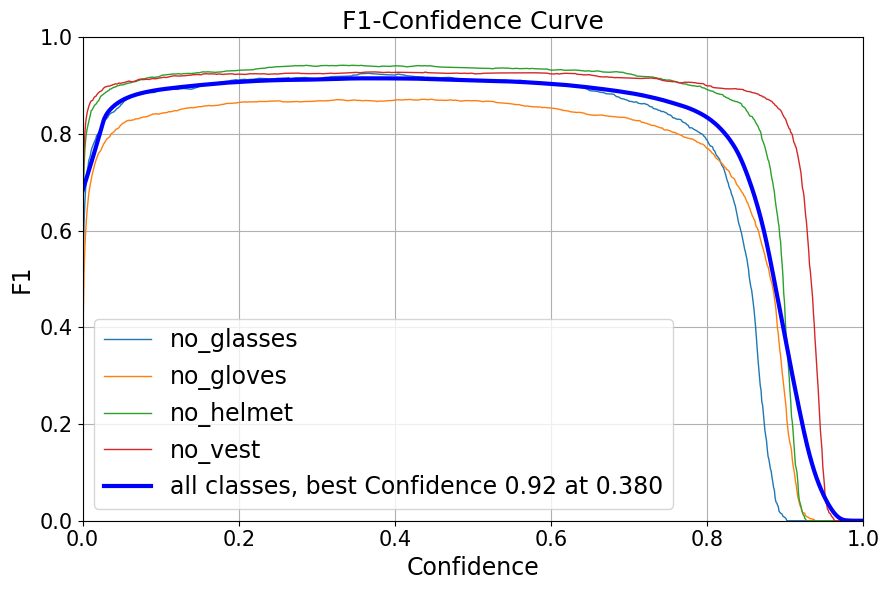

In [11]:
x, prec_values = np.linspace(0, 1, 1000), []

f1_curve = metrics.box.f1_curve
metrics.names
plot_mc_curve(x, f1_curve, metrics.names, ylabel="F1")

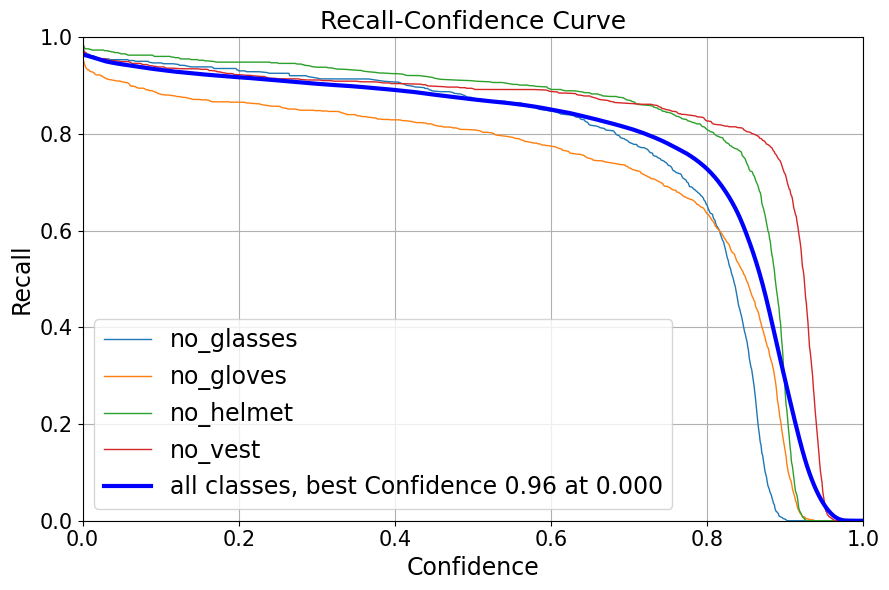

In [12]:
plot_mc_curve(x, metrics.box.r_curve, metrics.names, ylabel="Recall")

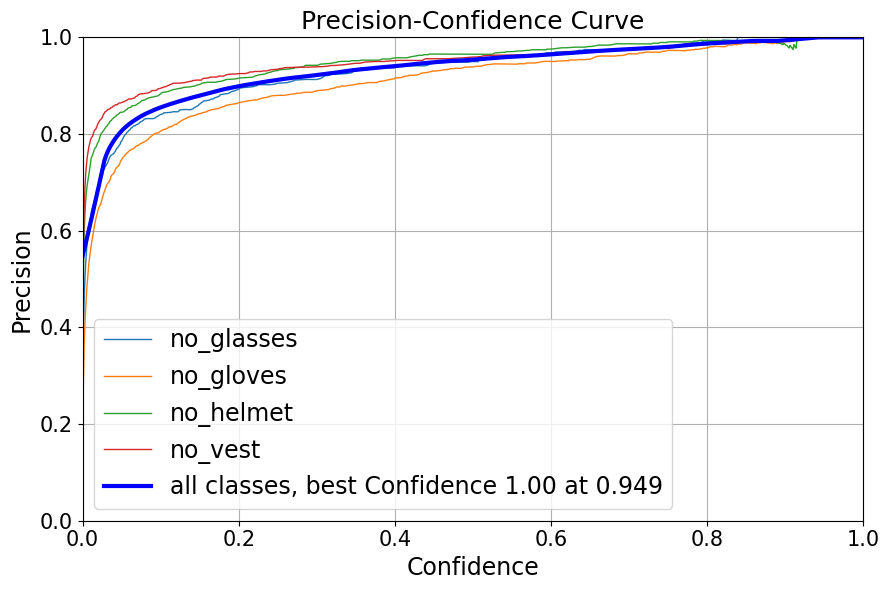

In [13]:
plot_mc_curve(x, metrics.box.p_curve, metrics.names, ylabel="Precision")

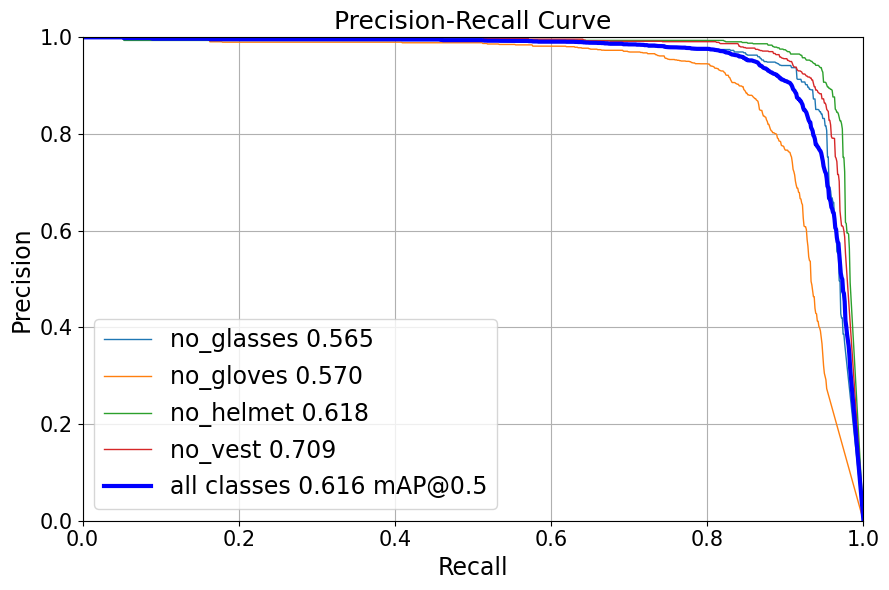

In [14]:
plot_pr_curve(x, metrics.box.prec_values, metrics.box.ap, metrics.names)

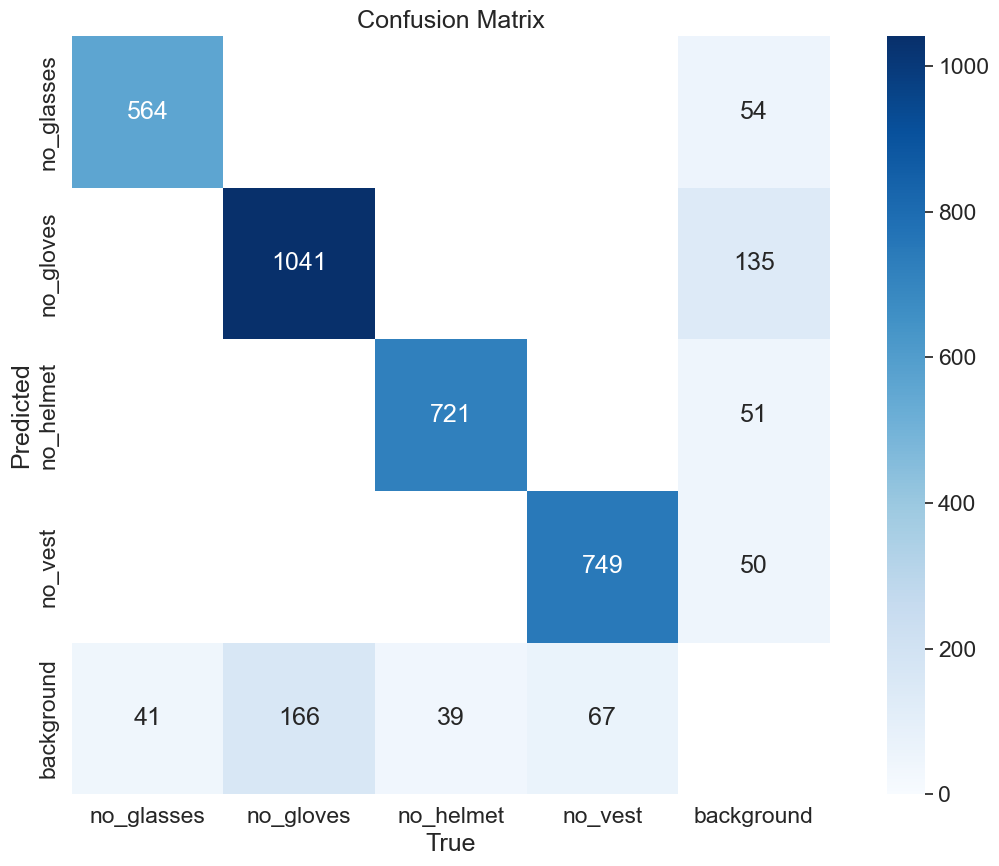

In [10]:
plot_confusion_matrix(metrics.confusion_matrix.matrix, normalize=False, names=metrics.names)

Predykcja

In [6]:
# Load a model
model = YOLO('runs/detect/dataset-v2-finetune-1/weights/last.pt')

# Define path to directory containing images and videos for inference
source = '/PRACA_MAGISTERSKA/DATASETS/PREDYKCJA/images'

# Run inference on the source
results = model(source)  # generator of Results objects

predictions = 'predictions/'
if not os.path.exists(predictions):
  os.mkdir(predictions)

# Process results list
for id, result in enumerate(results, 1):
    boxes = result.boxes          # Boxes object for bounding box outputs
    masks = result.masks          # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs          # Probs object for classification outputs
    obb = result.obb              # Oriented boxes object for OBB outputs
    result.show()                 # Display to screen
    result.save(filename= predictions + 'result_' + str(id) + '.jpg')  # Save to disk


image 1/3 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\spacer-seniora1-2048x1362.jpg: 448x640 2 no_glassess, 4 no_glovess, 2 no_helmets, 2 no_vests, 88.3ms
image 2/3 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-human-resource-team-talking-to-a-candidate-during-a-job-interview-in-the-office-2316131879.jpg: 480x640 3 no_glassess, 7 no_glovess, 5 no_helmets, 4 no_vests, 86.6ms
image 3/3 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-human-resources-commission-interviewing-male-applicant-in-office-2409886423.jpg: 480x640 4 no_glassess, 5 no_glovess, 4 no_helmets, 4 no_vests, 17.6ms
Speed: 2.8ms preprocess, 64.2ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


In [3]:
model = YOLO('runs/detect/dataset-v2-1/weights/epoch130.pt')
results = model.predict(source='/PRACA_MAGISTERSKA/DATASETS/PREDYKCJA/images', show_conf=False, show_labels=False, device=0, save=True, conf=0.364)


image 1/5 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\spacer-seniora1-2048x1362.jpg: 448x640 2 no_glassess, 3 no_glovess, 2 no_helmets, 2 no_vests, 83.1ms
image 2/5 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-engineers-railway-survey-wearing-safety-uniform-under-conversation-document-and-tablet-on-hand-2468533629.jpg: 480x640 (no detections), 75.9ms
image 3/5 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-human-resource-team-talking-to-a-candidate-during-a-job-interview-in-the-office-2316131879.jpg: 480x640 3 no_glassess, 5 no_glovess, 4 no_helmets, 4 no_vests, 19.8ms
image 4/5 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-human-resources-commission-interviewing-male-applicant-in-office-2409886423.jpg: 480x640 3 no_glassess, 4 no_glovess, 4 no_helmets, 4 no_vests, 22.4ms
image 5/5 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-latin-woman-with-curly-hair-wearing-a-hard-hat-and-reflective-vest-stands-confidently-in-a-city-257610339

In [2]:
import time

In [4]:
model = YOLO('runs/detect/dataset-v2-1/weights/epoch130.pt')
start_time = time.time()
results = model.predict(source="/PRACA_MAGISTERSKA/DATASETS/PREDYKCJA/videos", show=False, device=0, save=True, show_conf=False, show_labels=False, conf=0.364, batch=64)
end_time = time.time()



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/4 (frame 1/227) f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\videos\las.webm: 352x640 3 no_glassess, 3 no_glovess, 5 no_helmets, 5 no_vests, 6.1ms
video 1/4 (frame 2/227) f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\videos\las.webm: 352x640 3 no_glassess, 3 no_glovess, 5 no_helmets, 5 no_vests, 6.1ms
video 1/4 (frame 3/227) f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\videos\las.webm: 352x640 2 no_glassess, 2 no_glovess, 5 no_helmets, 5 no_vests, 6.1ms
video 1/

In [17]:
torch.cuda.empty_cache()

In [5]:
frame_count=1432
total_time = end_time - start_time
avg_fps = frame_count / total_time if total_time > 0 else 0

In [6]:
avg_fps

71.45238417940803